In [2]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import plotly
import cufflinks as cf
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.graph_objs import Scatter, Figure, Layout
init_notebook_mode(connected=True)
import cufflinks as cf
import plotly.plotly as py 
import cufflinks as cf
import plotly as py
init_notebook_mode(connected=True)

In [4]:
start=datetime.datetime(2006,1,1)
end=datetime.datetime(2015,12,31)

In [30]:
BAC=data.DataReader('BAC','morningstar',start,end)
BAC.tail()

Close   High    Low   Open    Volume
Symbol Date                                            
BAC    2015-12-25  17.27  17.27  17.27  17.27         0
       2015-12-28  17.13  17.23  16.98  17.22  41772177
       2015-12-29  17.28  17.35  17.16  17.25  45628949
       2015-12-30  17.05  17.24  17.04  17.20  35046768
       2015-12-31  16.83  17.07  16.83  17.01  47119705

In [6]:
GS=data.DataReader('GS','morningstar',start,end)
GS.tail()

Close      High       Low    Open   Volume
Symbol Date                                                   
GS     2015-12-25  182.47  182.4700  182.4700  182.47        0
       2015-12-28  181.62  181.9325  179.8400  181.77  1723330
       2015-12-29  183.53  184.1800  182.5003  182.82  1848859
       2015-12-30  182.01  183.5300  181.8400  183.28  1514347
       2015-12-31  180.23  182.8850  180.0300  181.16  1773531

In [7]:
C=data.DataReader('C','morningstar',start,end)

In [8]:
JPM=data.DataReader('JPM','morningstar',start,end)

In [9]:
MS=data.DataReader('MS','morningstar',start,end)

In [10]:
WFC=data.DataReader('WFC','morningstar',start,end)

In [11]:
tickers=['BAC','GS','C','JPM','MS','WFC']

In [12]:
BAC= BAC.unstack('Symbol')
C= C.unstack('Symbol')
GS= GS.unstack('Symbol')
JPM= JPM.unstack('Symbol')
MS= MS.unstack('Symbol')
WFC = WFC.unstack('Symbol')

In [13]:
bank_stocks=pd.concat([BAC,GS,C,JPM,MS,WFC],axis=1,keys=tickers)


In [74]:

bank_stocks.head()

Bank Ticker    BAC                                     GS                  \
Stock Info   Close   High    Low   Open    Volume   Close    High     Low   
Date                                                                        
2006-01-02   46.15  46.36  45.91  46.02         0  127.71  128.07  126.70   
2006-01-03   47.08  47.18  46.15  46.92  16197900  128.87  129.44  124.23   
2006-01-04   46.58  47.24  46.45  47.00  17427400  127.09  128.91  126.38   
2006-01-05   46.64  46.83  46.32  46.58  14668900  127.04  127.32  125.61   
2006-01-06   46.57  46.91  46.35  46.80  11965700  128.84  129.25  127.29   

Bank Ticker                     ...          MS                             \
Stock Info     Open   Volume    ...       Close     High      Low     Open   
Date                            ...                                          
2006-01-02   127.15        0    ...     47.1008  47.3333  46.7107  47.2751   
2006-01-03   126.70  6168700    ...     48.4041  48.5535  47.1008  47.4578   
2006-01-04   127.35  4834700    ...     48.4373  49.2093  48.4373  48.7278   
2006-01-05   126.00  3688100    ...     48.5701  48.6365  48.1634  48.6033   
2006-01-06   127.29  4249100    ...     48.6199  48.8524  48.1883  48.7860   

Bank Ticker              WFC                                    
Stock Info    Volume   Close    High     Low    Open    Volume  
Date                                                            
2006-01-02         0  31.415  31.535  31.215  31.415         0  
2006-01-03   6354408  31.900  31.975  31.195  31.600  11015000  
2006-01-04   9292188  31.530  31.820  31.365  31.800  10594000  
2006-01-05   6534262  31.495  31.555  31.310  31.500   9927600  
2006-01-06   8146445  31.680  31.775  31.385  31.580   8324000  

[5 rows x 30 columns]

In [72]:
bank_stocks.columns = bank_stocks.columns.droplevel(2)




In [73]:
bank_stocks.columns.names=['Bank Ticker', 'Stock Info']

In [75]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.9000
GS     247.9200
C      564.1000
JPM     70.0800
MS      74.1294
WFC     58.5200
dtype: float64

In [76]:
bank_stocks.head()

Bank Ticker    BAC                                     GS                  \
Stock Info   Close   High    Low   Open    Volume   Close    High     Low   
Date                                                                        
2006-01-02   46.15  46.36  45.91  46.02         0  127.71  128.07  126.70   
2006-01-03   47.08  47.18  46.15  46.92  16197900  128.87  129.44  124.23   
2006-01-04   46.58  47.24  46.45  47.00  17427400  127.09  128.91  126.38   
2006-01-05   46.64  46.83  46.32  46.58  14668900  127.04  127.32  125.61   
2006-01-06   46.57  46.91  46.35  46.80  11965700  128.84  129.25  127.29   

Bank Ticker                     ...          MS                             \
Stock Info     Open   Volume    ...       Close     High      Low     Open   
Date                            ...                                          
2006-01-02   127.15        0    ...     47.1008  47.3333  46.7107  47.2751   
2006-01-03   126.70  6168700    ...     48.4041  48.5535  47.1008  47.4578   
2006-01-04   127.35  4834700    ...     48.4373  49.2093  48.4373  48.7278   
2006-01-05   126.00  3688100    ...     48.5701  48.6365  48.1634  48.6033   
2006-01-06   127.29  4249100    ...     48.6199  48.8524  48.1883  48.7860   

Bank Ticker              WFC                                    
Stock Info    Volume   Close    High     Low    Open    Volume  
Date                                                            
2006-01-02         0  31.415  31.535  31.215  31.415         0  
2006-01-03   6354408  31.900  31.975  31.195  31.600  11015000  
2006-01-04   9292188  31.530  31.820  31.365  31.800  10594000  
2006-01-05   6534262  31.495  31.555  31.310  31.500   9927600  
2006-01-06   8146445  31.680  31.775  31.385  31.580   8324000  

[5 rows x 30 columns]

In [78]:
returns=pd.DataFrame()
for i in tickers:
    returns[i+'Return']=bank_stocks[i]['Close'].pct_change()

In [79]:
returns.head()

,BACReturn,GSReturn,CReturn,JPMReturn,MSReturn,WFCReturn
Date,,,,,,
2006-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-03,0.020152,0.009083,0.015660,0.012598,0.027670,0.015438
2006-01-04,-0.010620,-0.013812,-0.018462,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,-0.000393,0.004961,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.014169,0.000000,0.007046,0.001025,0.005874


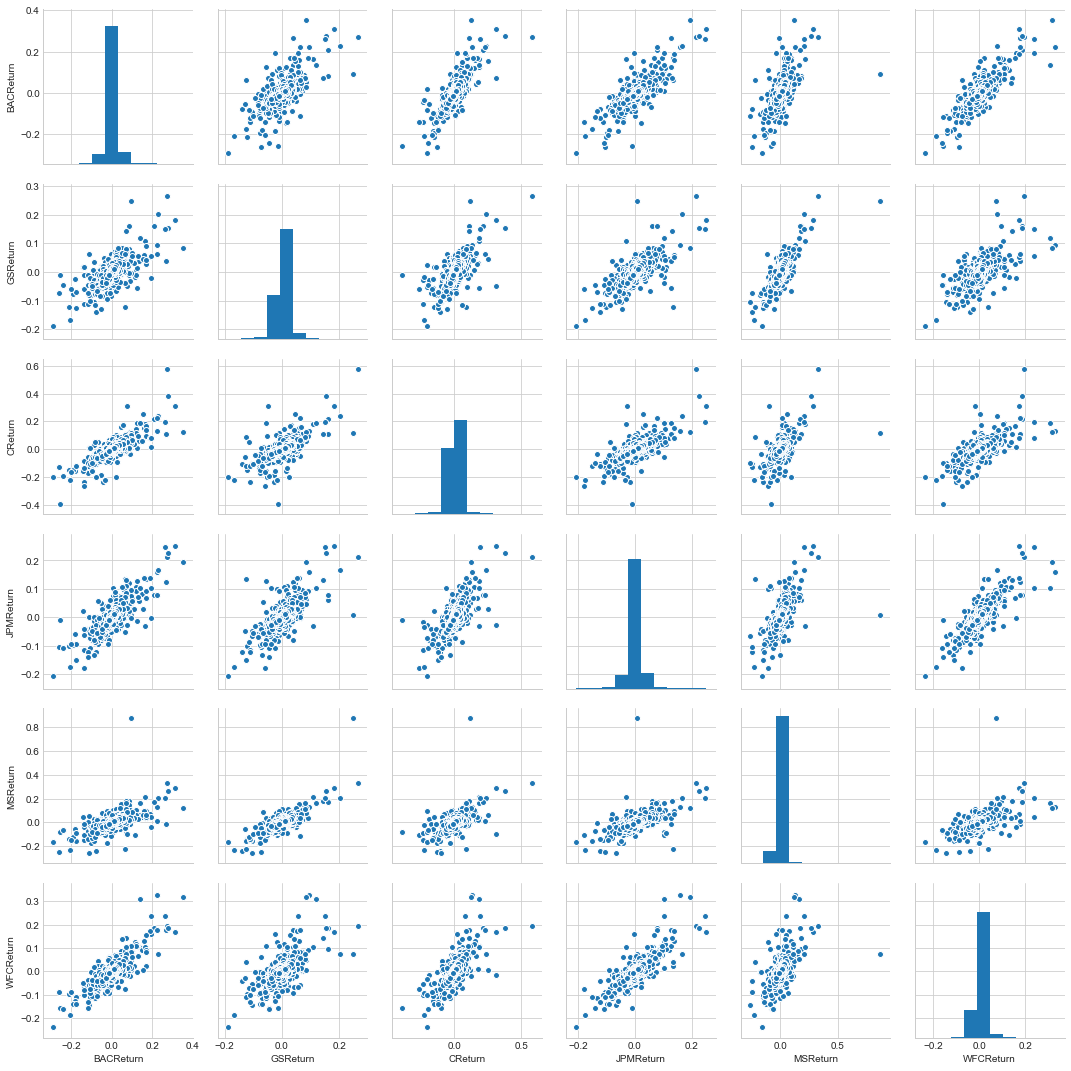

In [80]:
sns.pairplot(returns[1:])

In [81]:
returns['BACReturn'].argmin()

Timestamp('2009-01-20 00:00:00', freq='B')

In [82]:
returns.idxmin()

BACReturn   2009-01-20
GSReturn    2009-01-20
CReturn     2009-02-27
JPMReturn   2009-01-20
MSReturn    2008-10-09
WFCReturn   2009-01-20
dtype: datetime64[ns]

In [83]:
returns.idxmax()

BACReturn   2009-04-09
GSReturn    2008-11-24
CReturn     2008-11-24
JPMReturn   2009-01-21
MSReturn    2008-10-13
WFCReturn   2008-07-16
dtype: datetime64[ns]

In [84]:
returns.std()

BACReturn    0.035994
GSReturn     0.024955
CReturn      0.037985
JPMReturn    0.027228
MSReturn     0.037050
WFCReturn    0.029703
dtype: float64

In [85]:
returns.head()

,BACReturn,GSReturn,CReturn,JPMReturn,MSReturn,WFCReturn
Date,,,,,,
2006-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-03,0.020152,0.009083,0.015660,0.012598,0.027670,0.015438
2006-01-04,-0.010620,-0.013812,-0.018462,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,-0.000393,0.004961,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.014169,0.000000,0.007046,0.001025,0.005874


In [86]:
returns.ix['2015-01-01':'2015-12-31'].std()

C:\Users\mvkum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



BACReturn    0.015880
GSReturn     0.013801
CReturn      0.015022
JPMReturn    0.013772
MSReturn     0.015966
WFCReturn    0.012372
dtype: float64

C:\Users\mvkum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



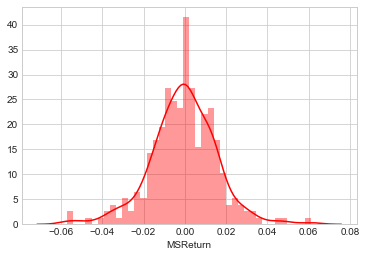

In [87]:
sns.distplot(returns.ix['2015-01-01':'2015-12-31']['MSReturn'],color='red',bins=40)

C:\Users\mvkum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



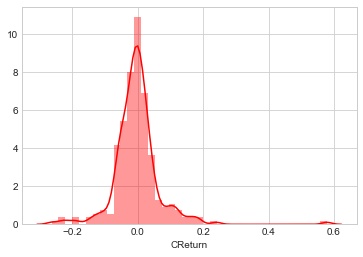

In [88]:
sns.distplot(returns.ix['2008-01-01':'2008-12-31']['CReturn'],color='red',bins=40)

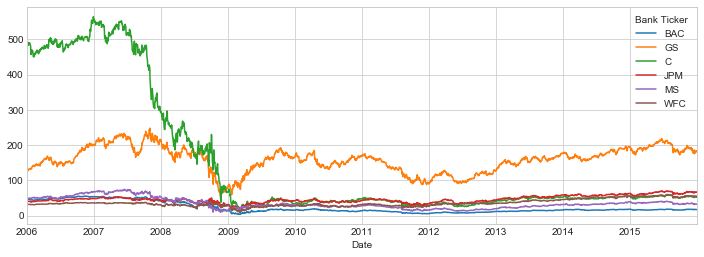

In [89]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot(figsize=(12,4))

In [91]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()
.plot(label='BAC CLOSE')
.plot(label='30 Day Mov Avg')

SyntaxError: invalid syntax (<ipython-input-91-ee9c54d08a70>, line 2)

In [92]:
BAC.head()

,Close,High,Low,Open,Volume
Symbol,BAC,BAC,BAC,BAC,BAC
Date,,,,,
2006-01-02,46.15,46.36,45.91,46.02,0
2006-01-03,47.08,47.18,46.15,46.92,16197900
2006-01-04,46.58,47.24,46.45,47.00,17427400
2006-01-05,46.64,46.83,46.32,46.58,14668900
2006-01-06,46.57,46.91,46.35,46.80,11965700


In [93]:
BAC.columns = BAC.columns.droplevel('Symbol')

In [94]:
JPM.columns = JPM.columns.droplevel('Symbol')

In [95]:
C.columns = C.columns.droplevel('Symbol')

In [96]:
MS.columns = MS.columns.droplevel('Symbol')

In [98]:
WFC.columns = WFC.columns.droplevel('Symbol')

AttributeError: 'Index' object has no attribute 'droplevel'

In [99]:
GS.columns = GS.columns.droplevel('Symbol')

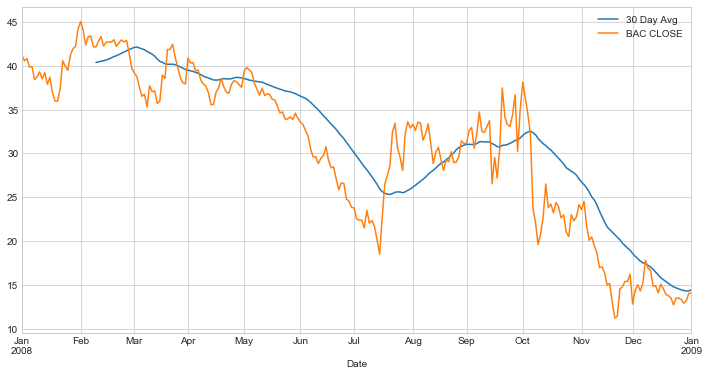

In [100]:
plt.figure(figsize=(12,6))
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')
plt.legend()

In [101]:
close_corr=bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()

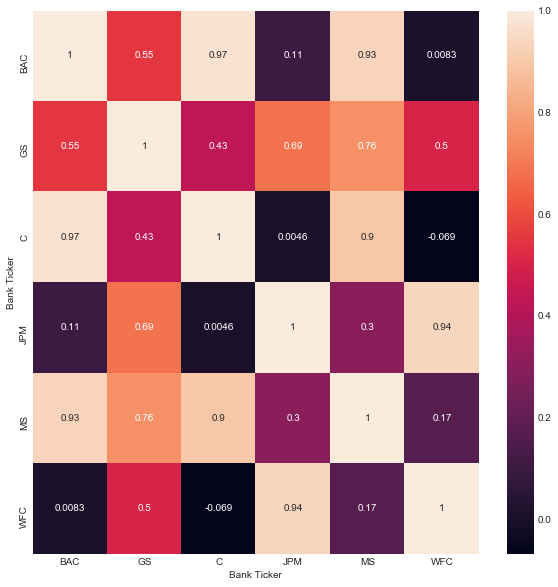

In [102]:
ax = plt.figure(figsize=(10,10))
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)


<Figure size 720x720 with 0 Axes>

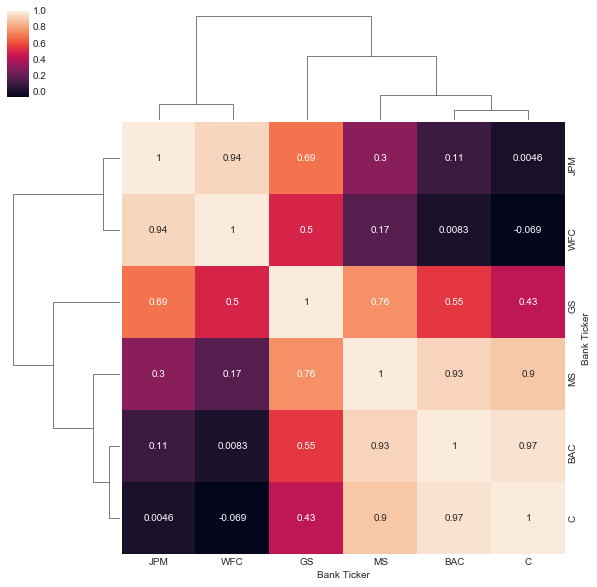

In [103]:
ax = plt.figure(figsize=(10,10))
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

In [104]:
init_notebook_mode(connected=True)
close_corr.iplot(kind='heatmap')

In [105]:
for i in range(1, 5+1):
    print((111111111//(10**(9-i)))**2)

1
121
12321
1234321
123454321


In [106]:
BAC.head(1)

,Close,High,Low,Open,Volume
Date,,,,,
2006-01-02,46.15,46.36,45.91,46.02,0


In [107]:
bac15=BAC[['Open','High','Low','Close']].ix['2015-01-01':'2016-01-01']

C:\Users\mvkum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



In [108]:
bac15.iplot(kind='candle')

In [109]:
#Simple Moving average
BAC['Close'].ix['2015-01-01':'2016-01-01'].ta_plot(study='boll')

C:\Users\mvkum\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



In [110]:
bank_stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2609 entries, 2006-01-02 to 2015-12-31
Freq: B
Data columns (total 30 columns):
(BAC, Close)     2609 non-null float64
(BAC, High)      2609 non-null float64
(BAC, Low)       2609 non-null float64
(BAC, Open)      2609 non-null float64
(BAC, Volume)    2609 non-null int64
(GS, Close)      2609 non-null float64
(GS, High)       2609 non-null float64
(GS, Low)        2609 non-null float64
(GS, Open)       2609 non-null float64
(GS, Volume)     2609 non-null int64
(C, Close)       2609 non-null float64
(C, High)        2609 non-null float64
(C, Low)         2609 non-null float64
(C, Open)        2609 non-null float64
(C, Volume)      2609 non-null int64
(JPM, Close)     2609 non-null float64
(JPM, High)      2609 non-null float64
(JPM, Low)       2609 non-null float64
(JPM, Open)      2609 non-null float64
(JPM, Volume)    2609 non-null int64
(MS, Close)      2609 non-null float64
(MS, High)       2609 non-null float64
(MS, Low)        